# Final Project

- [Report]()
- [Slides]()
- [Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)
- [API](https://docs.fastf1.dev/core.html#api-reference)

## Setup

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1

## Exploring/Cleaning Data

In [149]:
# session = fastf1.get_session(2022, 'Australia', 'race')
# session.load()
# display(session.name)
# display(session.date)
# display(session.session_info)
# display(session.drivers)
# display(session.results)
# display(session.laps)
# display(session.total_laps)
# display(session.weather_data)
# display(session.car_data)
# display(session.pos_data)
# display(session.session_start_time)
# display(session.t0_date)

## Circuits

In [150]:
circuits = pd.read_csv('circuits.csv')
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


## Races

In [151]:
races = pd.read_csv('races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


<Axes: xlabel='circuitId', ylabel='year'>

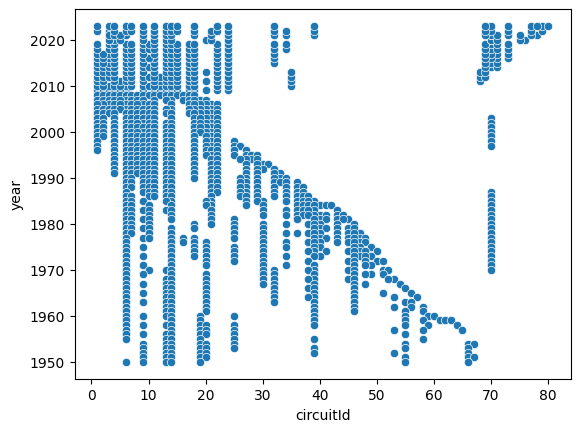

In [152]:
sns.scatterplot(x='circuitId', y='year', data=races)

In [153]:
raceTotals = races.groupby('circuitId').agg({'raceId': 'count', 'year': 'max'}).reset_index()
raceTotals = raceTotals[raceTotals.year == 2023].reset_index(drop=True).sort_values('raceId', ascending=False)
raceTotals

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
4,7,42,2023
10,18,40,2023
6,11,38,2023
16,70,37,2023
11,22,33,2023
14,39,33,2023


<Axes: xlabel='circuitId', ylabel='year'>

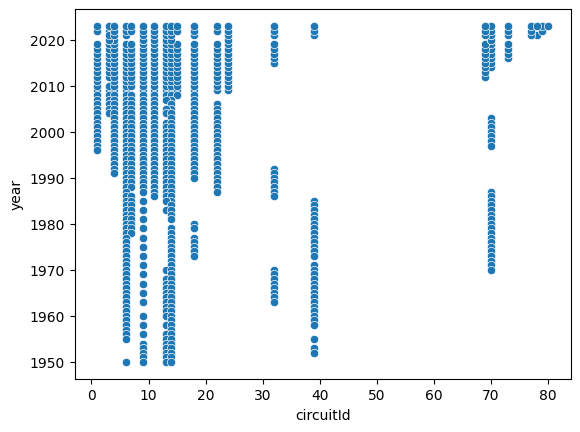

In [154]:
recentRaces = races[races.circuitId.isin(raceTotals.circuitId)].reset_index(drop=True)
sns.scatterplot(x='circuitId', y='year', data=recentRaces)

In [155]:
circuitsToKeep = recentRaces[recentRaces.year == 2009]
recentRaces = races[races.circuitId.isin(circuitsToKeep.circuitId)].reset_index(drop=True)
commonNames = recentRaces.groupby('circuitId')['name'].agg(lambda x: x.mode().iloc[0]).reset_index()
commonNames.columns = ['circuitId', 'common_name']
recentRaces = pd.merge(recentRaces, commonNames, on='circuitId', how='left')
display(recentRaces)
display(recentRaces.common_name.unique())
display(raceTotals[raceTotals.circuitId.isin(recentRaces.circuitId)])

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,common_name
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Australian Grand Prix
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain Grand Prix
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Spanish Grand Prix
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monaco Grand Prix
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,British Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,2023-09-01,15:00:00,2023-09-02,10:30:00,2023-09-02,14:00:00,\N,\N,Italian Grand Prix
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,2023-09-15,13:00:00,2023-09-16,09:30:00,2023-09-16,13:00:00,\N,\N,Singapore Grand Prix
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,2023-09-22,06:00:00,2023-09-23,02:30:00,2023-09-23,06:00:00,\N,\N,Japanese Grand Prix
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,Brazilian Grand Prix


array(['Australian Grand Prix', 'Bahrain Grand Prix',
       'Spanish Grand Prix', 'Monaco Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix',
       'Brazilian Grand Prix', 'Abu Dhabi Grand Prix'], dtype=object)

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
10,18,40,2023
6,11,38,2023
11,22,33,2023
2,4,33,2023
0,1,26,2023
1,3,20,2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australian Grand Prix'),
  Text(1, 0, 'Bahrain Grand Prix'),
  Text(2, 0, 'Spanish Grand Prix'),
  Text(3, 0, 'Monaco Grand Prix'),
  Text(4, 0, 'British Grand Prix'),
  Text(5, 0, 'Hungarian Grand Prix'),
  Text(6, 0, 'Belgian Grand Prix'),
  Text(7, 0, 'Italian Grand Prix'),
  Text(8, 0, 'Singapore Grand Prix'),
  Text(9, 0, 'Japanese Grand Prix'),
  Text(10, 0, 'Brazilian Grand Prix'),
  Text(11, 0, 'Abu Dhabi Grand Prix')])

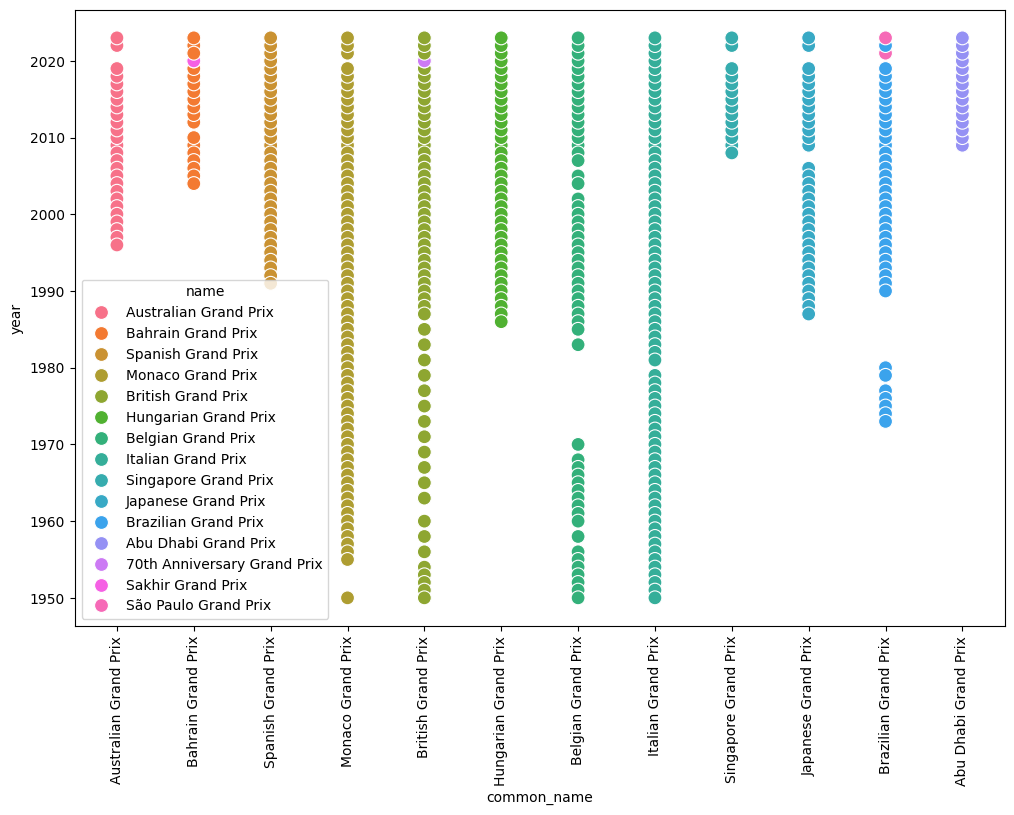

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='common_name', y='year', data=recentRaces, hue='name', s=100)
plt.xticks(rotation=90)

In [157]:
recentRaces = pd.merge(recentRaces, circuits, on='circuitId', how='left')
recentRaces = recentRaces.rename(columns={'name_x': 'race_name', 'url_x': 'race_url', 'common_name': 'common_race_name', 'name_y': 'circuit_name', 'url_y': 'circuit_url'})
recentRaces

,raceId,year,round,circuitId,race_name,date,time,race_url,fp1_date,fp1_time,...,sprint_time,common_race_name,circuitRef,circuit_name,location,country,lat,lng,alt,circuit_url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,...,\N,Bahrain Grand Prix,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,...,\N,Spanish Grand Prix,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,...,\N,Monaco Grand Prix,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,...,\N,British Grand Prix,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,...,\N,Italian Grand Prix,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,...,\N,Singapore Grand Prix,marina_bay,Marina Bay Street Circuit,Marina Bay,Singapore,1.2914,103.86400,18,http://en.wikipedia.org/wiki/Marina_Bay_Street...
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,...,\N,Japanese Grand Prix,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45,http://en.wikipedia.org/wiki/Suzuka_Circuit
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,...,18:30:00,Brazilian Grand Prix,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...


## Constructor Results

In [158]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_results = pd.merge(constructor_results, races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']], how='left')
constructor_results

,constructorResultsId,raceId,constructorId,points,status,year,round,circuitId,name,date,time
0,1,18,1,14.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,18,2,8.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,18,3,9.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,18,4,5.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,18,5,2.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...
12285,16785,1110,214,10.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12286,16786,1110,213,1.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12287,16787,1110,51,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12288,16788,1110,3,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00


## Constructor Standings

In [159]:
constructor_standings = pd.read_csv('constructor_standings.csv')
display(constructor_standings)
constructor_standings.groupby('raceId').agg({'constructorId': 'count', 'wins': 'sum'})
# constructor_standings[constructor_standings.constructorId == 1].wins.tolist()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


,constructorId,wins
raceId,,
1,9,1
2,10,2
3,10,3
4,10,4
5,10,5
...,...,...
1106,10,8
1107,10,9
1108,10,10
